- 분류 문제에서의 목표 데이터는 '클래스'
    - {0: 과일, 1: 야채, 2: 곡물} 정수를 할당할 수 있지만 순서는 의미가 없음
- 확률의 개념을 도입 ➡️ 목표 데이터의 확률을 출력하는 함수를 고려
    - 예측의 '불확실성'을 정량적으로 다룰 수 있게 됨

## 6.1 1차원 입력 2클래스 분류
### 6.1.1 문제 설정
- 1차원의 입력 변수: xn
- 목표 변수: tn
    - 0 또는 1만을 갖는 변수로 클래스 0이면 0, 클래스 1이면 1을 가짐
    - 클래스, 카테고리, 라벨 등으로 칭함
- 데이터의 인덱스: n
- 데이터의 크기: N

In [ ]:
### 목적: 무게를 통해 성별을 예측하는 모델을 만드는 것
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성 ------------------------
np.random.seed(seed=0) # 난수 고정
X_min = 0
X_max = 2.5
X_n = 30
X_col = ['cornflowerblue', 'gray']

X = np.zeros(X_n) # 입력 데이터
T = np.zeros(X_n, dtype = np.uint8) # 목표 데이터
Dist_s = [0.4, 0.8] # 분포의 시작 지점
Dist_w = [0.8, 1.6] # 분포의 폭
Pi = 0.5 # 클래스 0의 비율
for n in range(X_n):
    wk = np.random.rand() ### 0~1의 난수로 지정
    ### 확률적으로 결정
    T[n] = 0 * (wk < Pi) + 1 * (wk >= Pi) # (A)
    ### 암컷이라면 Dist_s[0] = 0.4에서 폭 Dist_w[0] = 0.8 (0.4에서 1.2까지) 균일한 분포에서 질량을 샘플링
    ### 수컷이라면 Dist_s[1] = 0.8에서 폭 Dist_w[1] = 1.6 (0.8에서 2.4까지) 균일한 분포에서 질량을 샘플링
    X[n] = np.random.rand() * Dist_w[T[n]] + Dist_s[T[n]] # (B)

# 데이터 표시 ------------------------
print('X = ' + str(np.round(X, 2))) ### 무게 데이터
print('T = ' + str(T)) ### 성별 데이터

X = [1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T = [1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


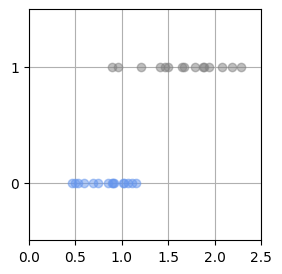

In [ ]:
# 데이터 분포 표시 ------------------------
def show_data1(x, t):
    K = np.max(t) + 1
    for k in range(K): # (A)
        ### 처음 k=0의 처리는 t==0일 때 x와 t만을 추출하여 플롯하는 명령
        ### x[t==0]을 사용하면 t==0을 채우는 요소번호 x가 추출됨으로 편리!
        plt.plot(x[t==k], t[t==k], X_col[k], alpha=0.5,
                 linestyle='None', marker='o') # (B)
        plt.grid(True)
        plt.ylim(-.5, 1.5)
        plt.xlim(X_min, X_max)
        plt.yticks([0, 1])

# 메인 -----------------------------------
fig = plt.figure(figsize=(3, 3))
show_data1(X, T)
plt.show()

문제를 풀기 위한 방침: 수컷과 암컷을 분리하는 경계선을 결정하는 것 ➡️ 결정경계, 이를 통해 새로운 데이터에 대한 예측이 가능함

- 선형 회귀 모델을 통해 결정경계를 결정?

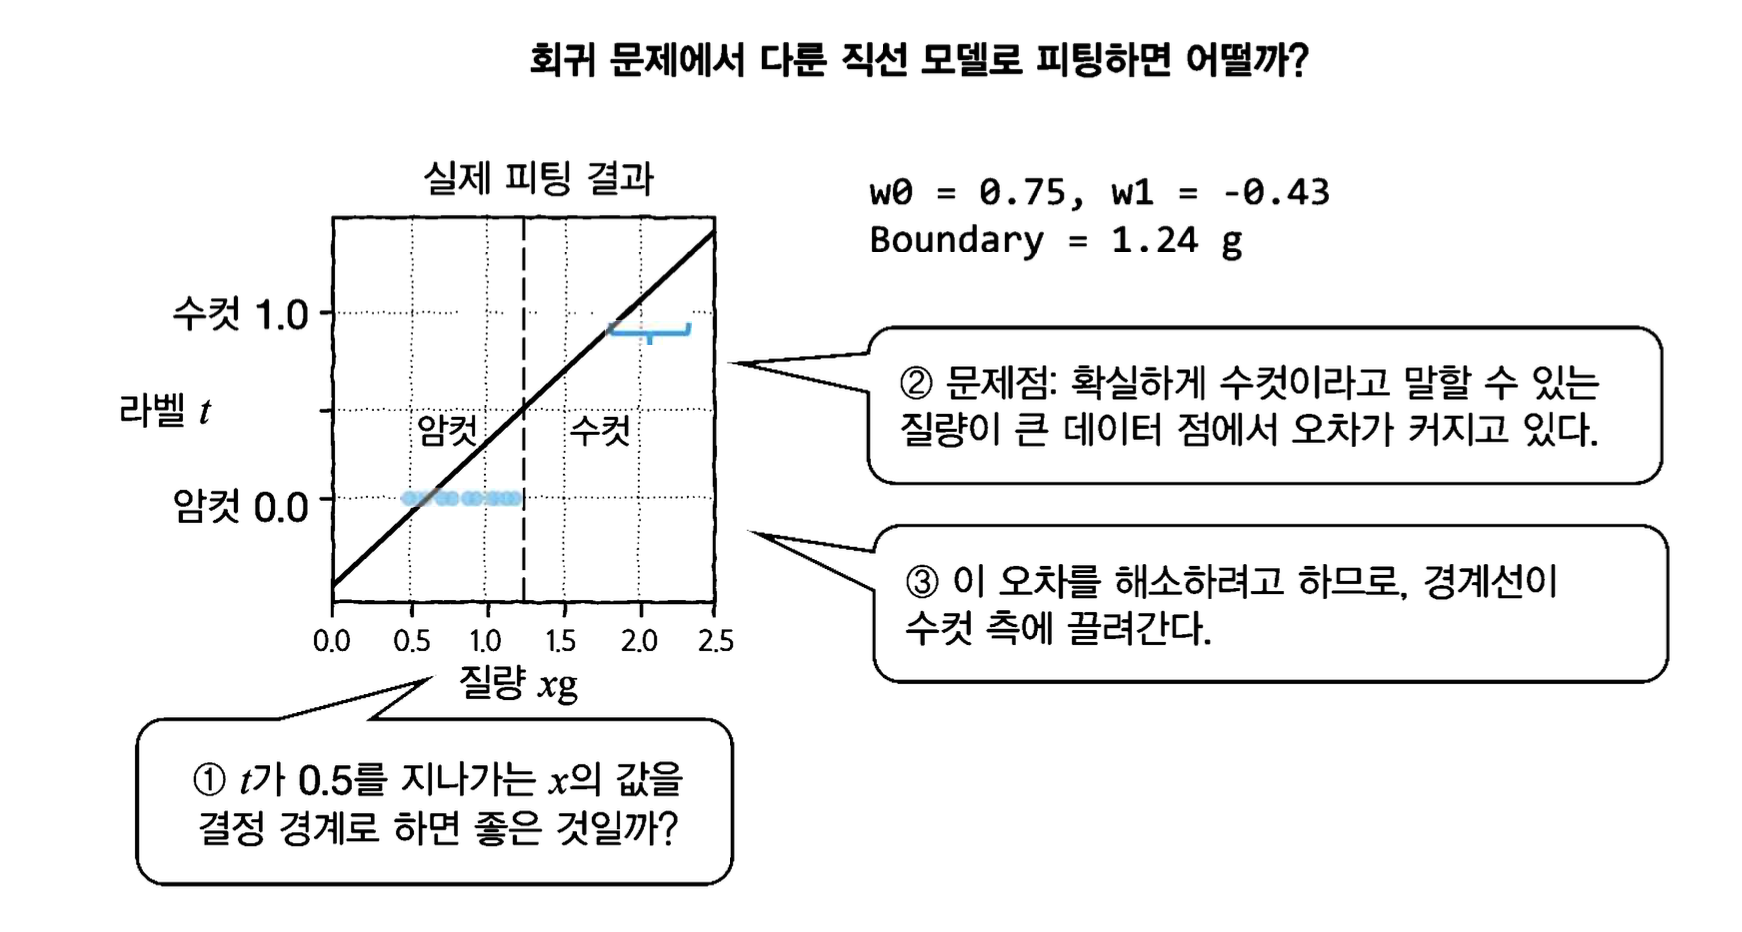

3번 현상은 빗나간 값이 클수록 심각해짐! ➡️ 다른 방법을 찾아볼 필요가 있음

### 6.1.2 확률로 나타내는 클래스 분류
- 데이터의 분포가 균일 분포, 그 분포 범위도 완전히 알고 있으면 확률을 포함한 예측 가능
- 수컷일 경우와 암컷일 경우가 모두 존재하는 구간에서는 확률을 포함해, 모호성을 확률로 포함해 예측
    - 예: 수컷일 확률은 1/3이다
- 조건부 확률의 계단형 그래프: 클래스 분류의 답을 나타냄 (확률적인 예측으로)
    - 불확실성을 명확히 표현할 수 있다는 점에서 직선에 의한 피팅보다 우수
    - 하지만 결정 경계를 어디에? **P(t=1|x) = 0.5가 되는 x가 결정 경계**

### 6.1.3 최대가능도법 (Maximum likelihood method, 최대우도법)
- 어떤 확률 변수에서 표집한 값들을 토대로 그 확률변수의 모수를 구하는 방법
- 어떤 모수가 주어졌을 떄, 원하는 값들이 나올 가능도(우도, 확률)를 최대로 만드는 모수를 선택하는 방법
- 앞의 예시는 인공적인 데이터를 이용해 실제 분포 정보를 알고 있었음 (해석적 방법 채택)
- 하지만 실제로는 데이터로부터 분포를 추정해야함

    AFTER: 주어진 데이터 집합이 발생할 확률 ➡ 가능도(우도)

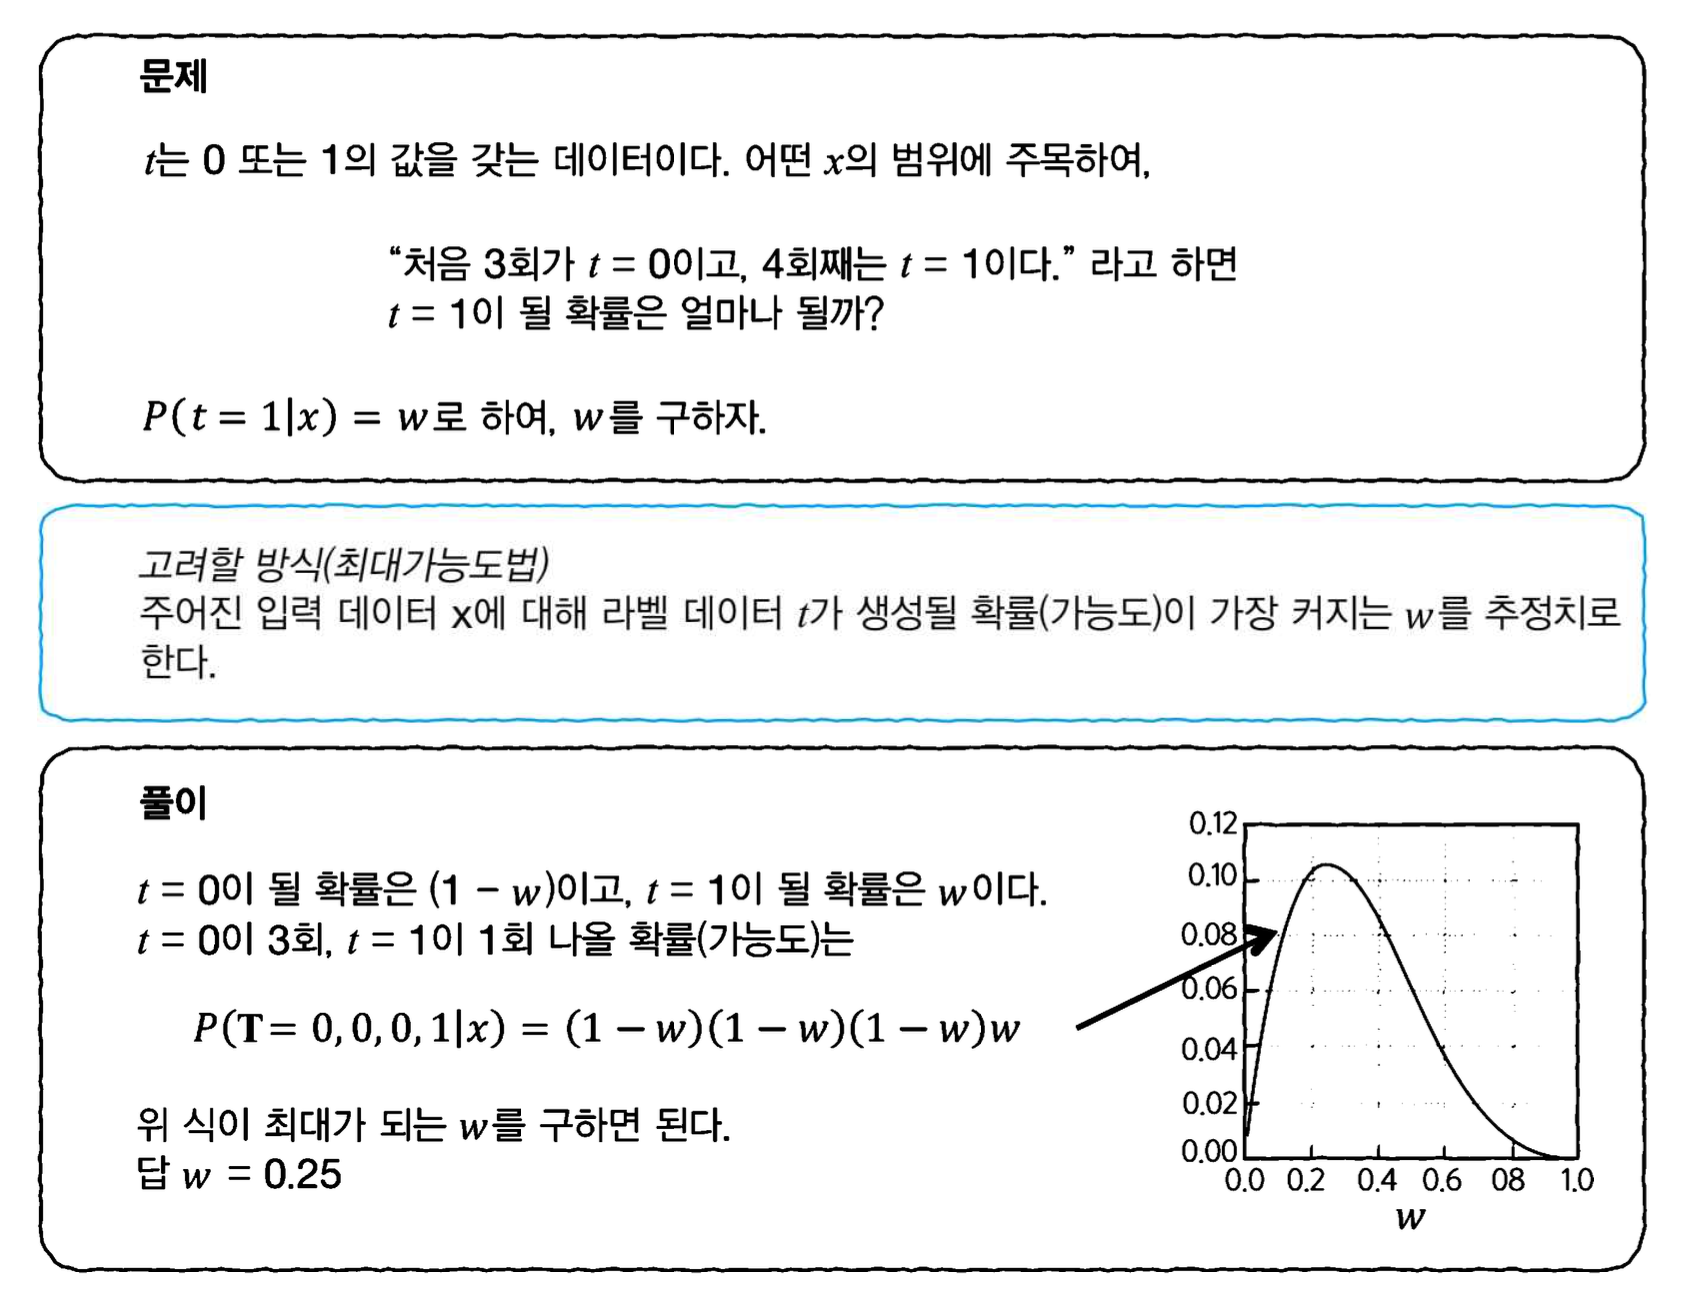

위로 솟은 극대점에서의 w ➡️ 가장 적절한 값이자 추정치
- 연속된 곱셈을 다루는 것은 매우 힘들기 때문에 양변에 log를 취해 곱셈을 덧셈으로 바꿔줌
    - log는 단조 증가 함수이므로 P를 최대로 만드는 w와 logP를 최대로 만드는 w는 바뀌지 않음
    - logP를 최대화하는 w = P를 최대화 하는 w
- log를 취한 가능도(우도)를 로그 가능도(log likelihood)라고 부름
    - MSE 대신 사용되는 확률 세계의 목적 함수
    - MSE는 값을 최소화하는 매개 변수를 찾지만, 로그 가능도는 최대화하는 매개 변수를 찾음

### 6.1.4 로지스틱 회귀 모델
- 실제 데이터는 균일하게 분포되는 경우가 거의 없음 (계단식 분포로 나타나지 않음)
- 따라서 인공 데이터로 학습을 할 때도, 균일한 분포에서 생성시키고 있지만 가우스 분포를 따른다고 가정함
    - 이 가정의 근원인 조건부 확률 P(t=1|x)은 로지스틱 회귀 모델로 나타낼 것
    - 로지스틱 회귀 모델: 독립변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용
        - 목적: 일반적인 회귀 분석의 목표와 동일하게 종속 변수와 독립 변수간의 관계를 구체적인 함수로 나타내어 향후 예측 모델에 사용하는 것
        - 선형 회귀 분석과는 다르게 종속 변수가 범주형 데이터를 대상으로 하며, 입력 데이터가 주어졌을 때 해당 데이터의 결과가 특정 분류로 나뉘기 때문에 일종의 분류 기법으로 볼 수도 있음

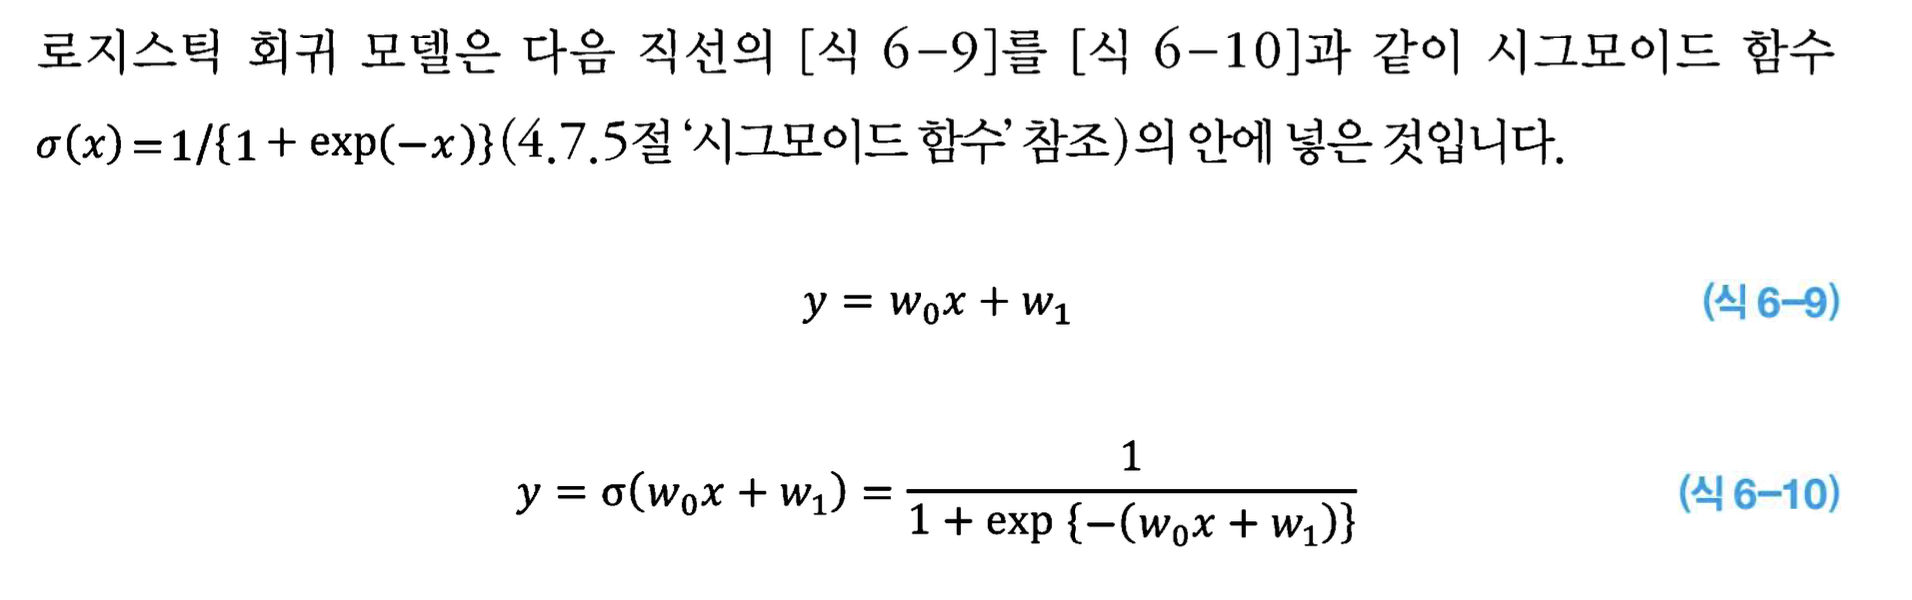

- 직선 모델의 큰 양의 출력은 1에 가까운 값으로, 절대값이 큰 음의 출력은 0에 가까운 값으로 변환 ➡️ 직선의 함수는 0과 1의 범위에 들어감

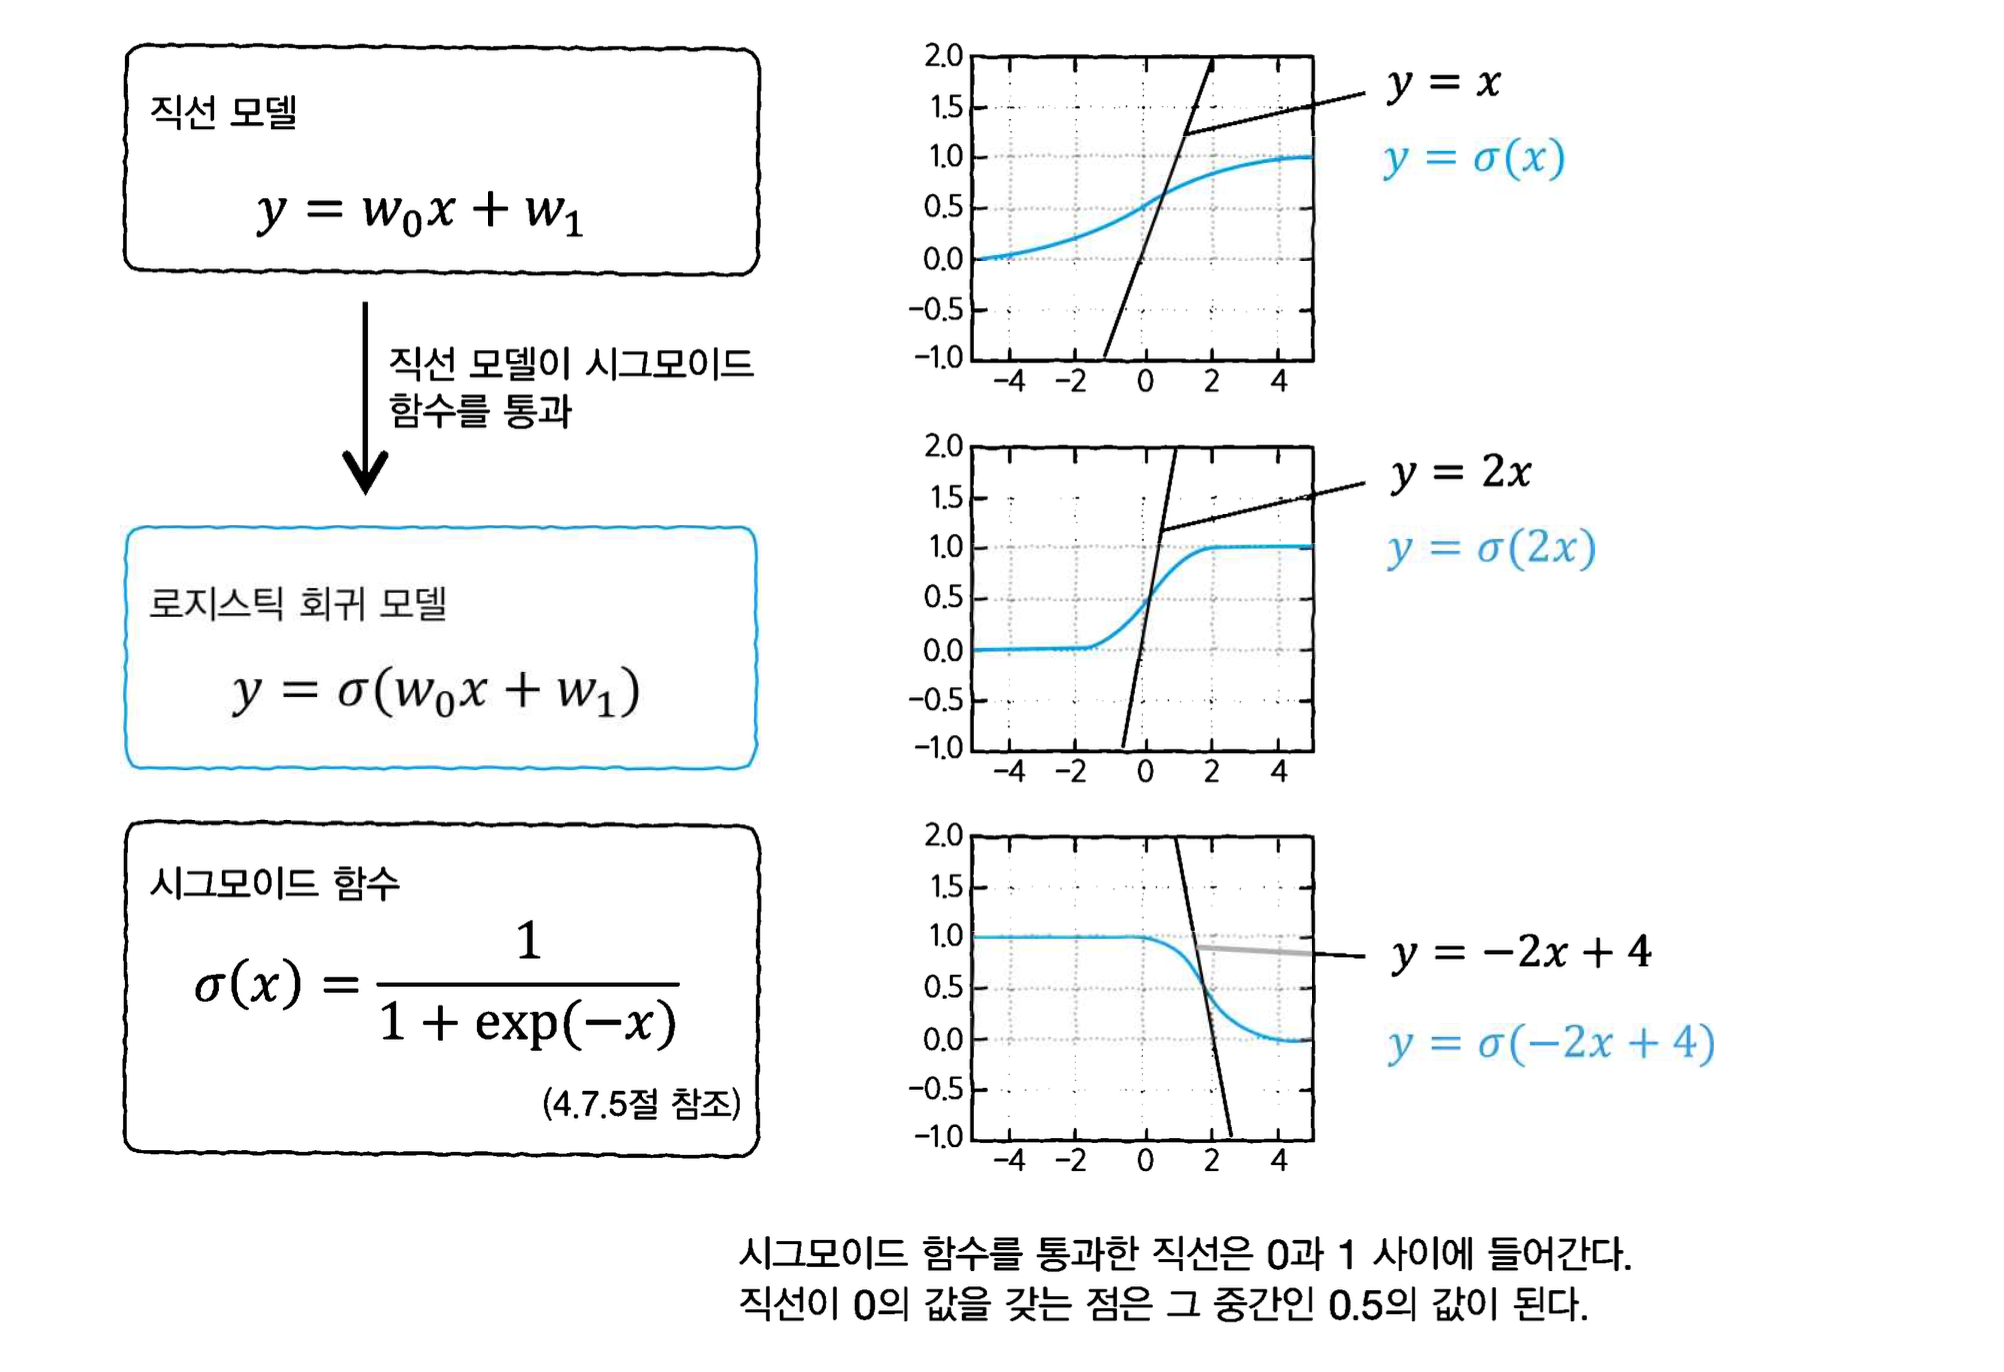

    AFTER
    : 최적의 w를 찾기 위해서는 가능도(우도)를 따져볼 필요가 있음
    : 시그모이드를 통과한 값(클래스 내에서의 확률 값)에 대해 softmax를 적용해 각 클래스일 확률값으로 변환
    : softmax를 거치면 확률의 합이 1로 변해 상대적인 값을 판단할 수 있음

In [ ]:
### 로지스틱 회귀 모델 정의
def logistic(x, w):
    y = 1 / (1 + np.exp(-(w[0] * x + w[1])))
    return y

1.25

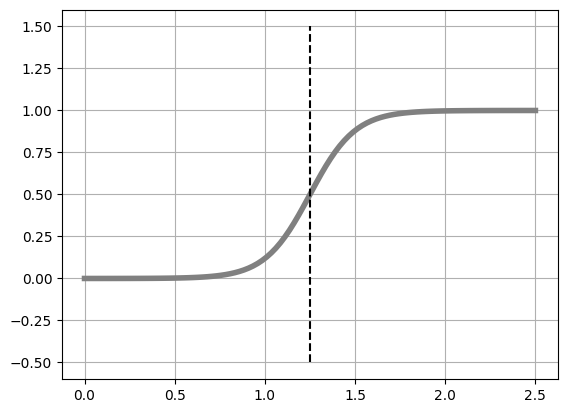

In [ ]:
### 로지스틱 회귀 모델을 결정 경계와 함께 표시하는 함수 정의
def show_logistic(w):
    xb = np.linspace(X_min, X_max, 100)
    y = logistic(xb, w)
    plt.plot(xb, y, color='gray', linewidth=4)

    # 결정 경계
    ### 결정 경계는 y = 0.5가 되는 x의 값
    i = np.min(np.where(y > 0.5)) # (A) | i는 y가 0.5를 넘은 직후의 요소 번호
    B = (xb[i-1] + xb[i]) / 2 # (B) | y가 0.5를 넘은 직후의 xb[i]와, 그 직전의 xb[i-1]의 평균이 결정 경계의 근사치로서 B에 저장됨
    plt.plot([B, B], [-.5, 1.5], color='k', linestyle='--')
    plt.grid(True)
    return B

# test
W = [8, -10]
show_logistic(W)

### 6.1.5 교차 엔트로피 오차
- 특정 데이터에 대해 (T = 0, 0, 0, 1) 최대 가능도법을 시도했지만 여기에서는 어떤 데이터에도 대응할 수 있도록 시도
- P(t|x) = yt(1-y)1-t
    - 지수를 스위치처럼 사용!

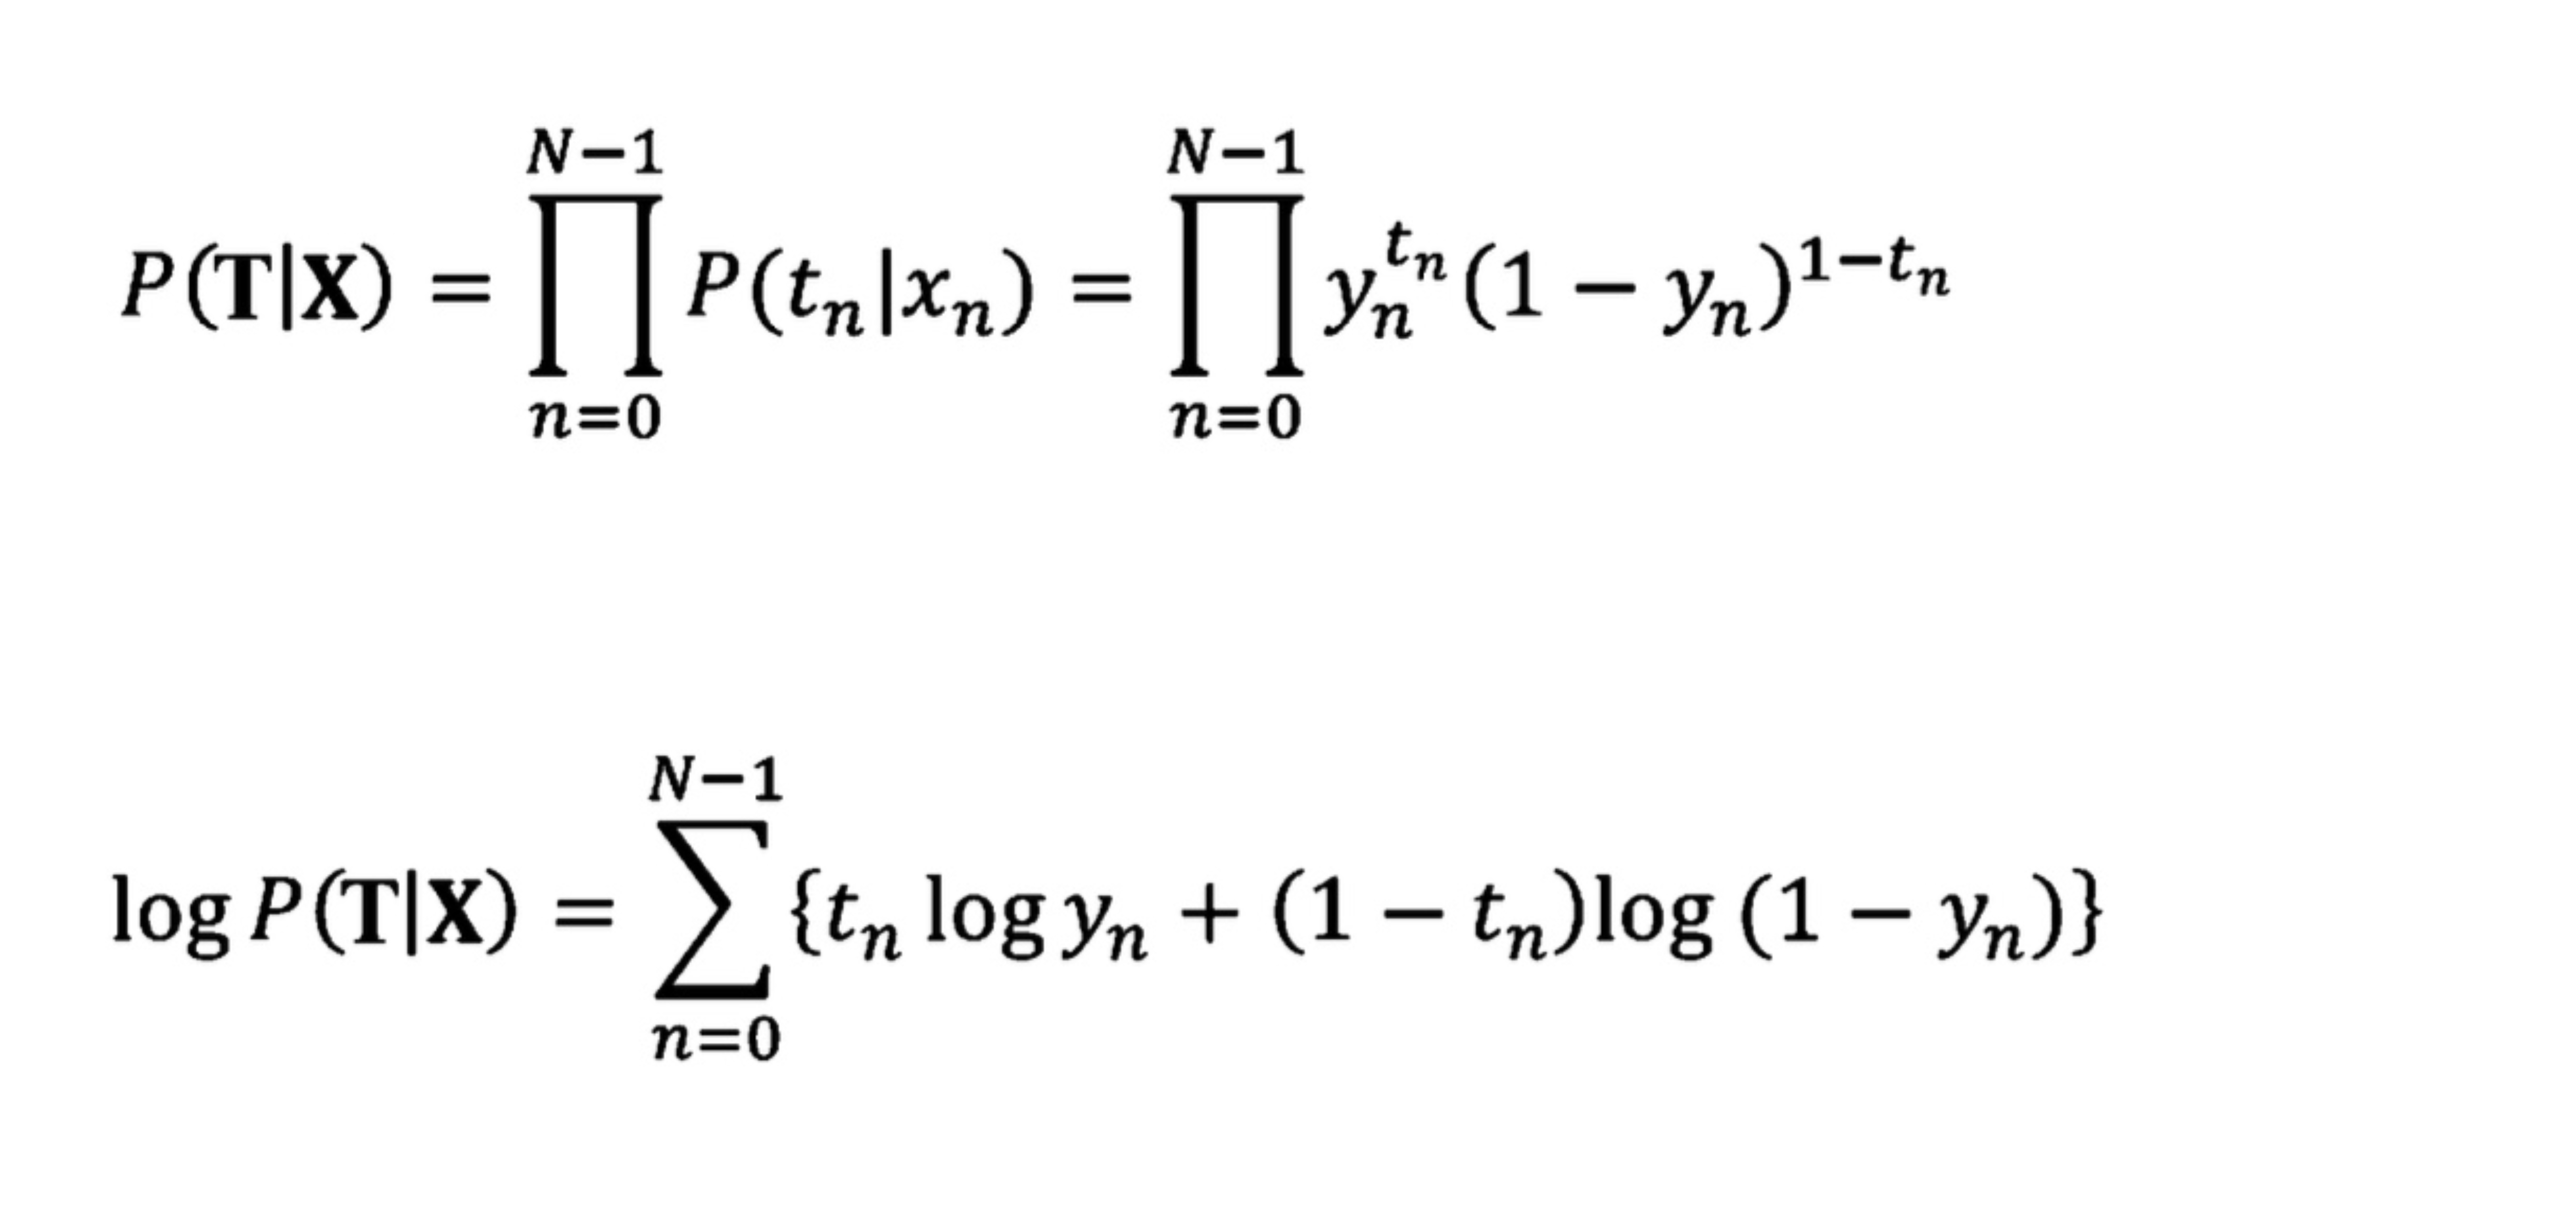

가능도를 구하고, log를 취해 로그 가능도를 얻을 수 있음!
- 여기서 매개 변수 w0, w1을 로그 가능도가 최대가 되는 값으로 구하면 됨

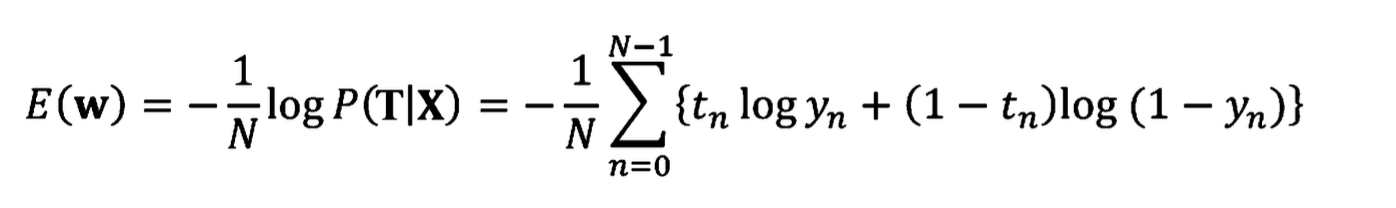

로그 가능도에 -1을 곱해 교차 엔트로피 오차(cross-entropy error function)를 구함
- 똑같이 오차가 '최소'가 되는 매개 변수를 구하면 됨
- 교차 엔트로피를 N으로 나눈 값을 평균 교차 엔트로피 오차인 E(w)로 정의
    - 이렇게 하면 데이터 개수에 영향을 덜 받고, 수치를 확인하기에 편함

In [ ]:
# 평균 교차 엔트로피 오차 -----------------
def cee_logistic(w, x, t):
    y = logistic(x, w)
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n] * np.log(y[n]) + (1 - t[n]) * np.log(1- y[n]))
    cee = cee / X_n
    return cee

# test
W = [1, 1]
cee_logistic(W, X, T)

1.0288191541851066

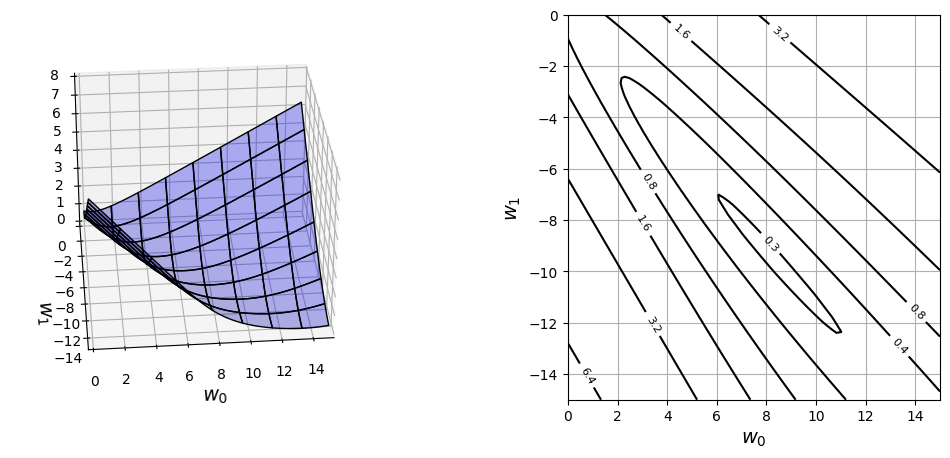

In [ ]:
### 평균 교차 엔트로피 오차의 모양을 확인
from mpl_toolkits.mplot3d import Axes3D

# 계산 -----------------
xn = 80 # 등고선 표시 해상도
w_range = np.array([[0, 15], [-15, 0]])
x0 = np.linspace(w_range[0, 0], w_range[0, 1], xn)
x1 = np.linspace(w_range[1, 0], w_range[1, 1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
C = np.zeros((len(x1), len(x0)))
w = np.zeros(2)
for i0 in range(xn):
    for i1 in range(xn):
        w[0] = x0[i0]
        w[1] = x1[i1]
        ### 인덱스에 주의
        C[i1, i0] = cee_logistic(w, X, T)

# 표시 -----------------
plt.figure(figsize=(12, 5))
# plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, C, color='blue', edgecolor='black',
                rstride=10, cstride=10, alpha=0.3)
ax.set_xlabel('$w_0$', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax.set_xlim(0, 15)
ax.set_ylim(-15, 0)
ax.set_zlim(0, 8)
ax.view_init(30, -95)

plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, C, 20, colors='black',
                   levels=[0.26, 0.4, 0.8, 1.6, 3.2, 6.4])
cont.clabel(fmt='%1.1f', fontsize=8)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.grid(True)
plt.show()

- (왼) 평균 교차 엔트로피 오차 함수: 보자기의 대각선 모서리를 잡고 들어올리는 모양
    - 최소치는 w0 = 9, w1 = -9 의 근처에 있을 것
- (오) 등고선 함수

### 6.1.6 학습 규칙의 도출
- yn이 비선형의 시그모이드 함수를 포함하고 있기 떄문에 오차를 최소화하는 매개 변수의 분석해는 구할 수 없음
- 지금까지와 같은 경사 하강법을 이용해 수치적으로 구하는 것을 고려

In [ ]:
# 평균 교차 엔트로피 오차의 미분 ------------------
def dcee_logistic(w, x, t):
    y = logistic(x, w)
    dcee = np.zeros(2)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n]) * x[n]
        dcee[1] = dcee[1] + (y[n] - t[n])
    dcee = dcee / X_n
    return dcee

# test -------------------------------------
W = [1, 1]
dcee_logistic(W, X, T)

array([0.30857905, 0.39485474])

출력: w0 방향의 편미분 값과 w1 방향의 편미분 값을 요소로 갖는 ndarray 배열

*로지스틱 회귀 모델의 학습 정리*

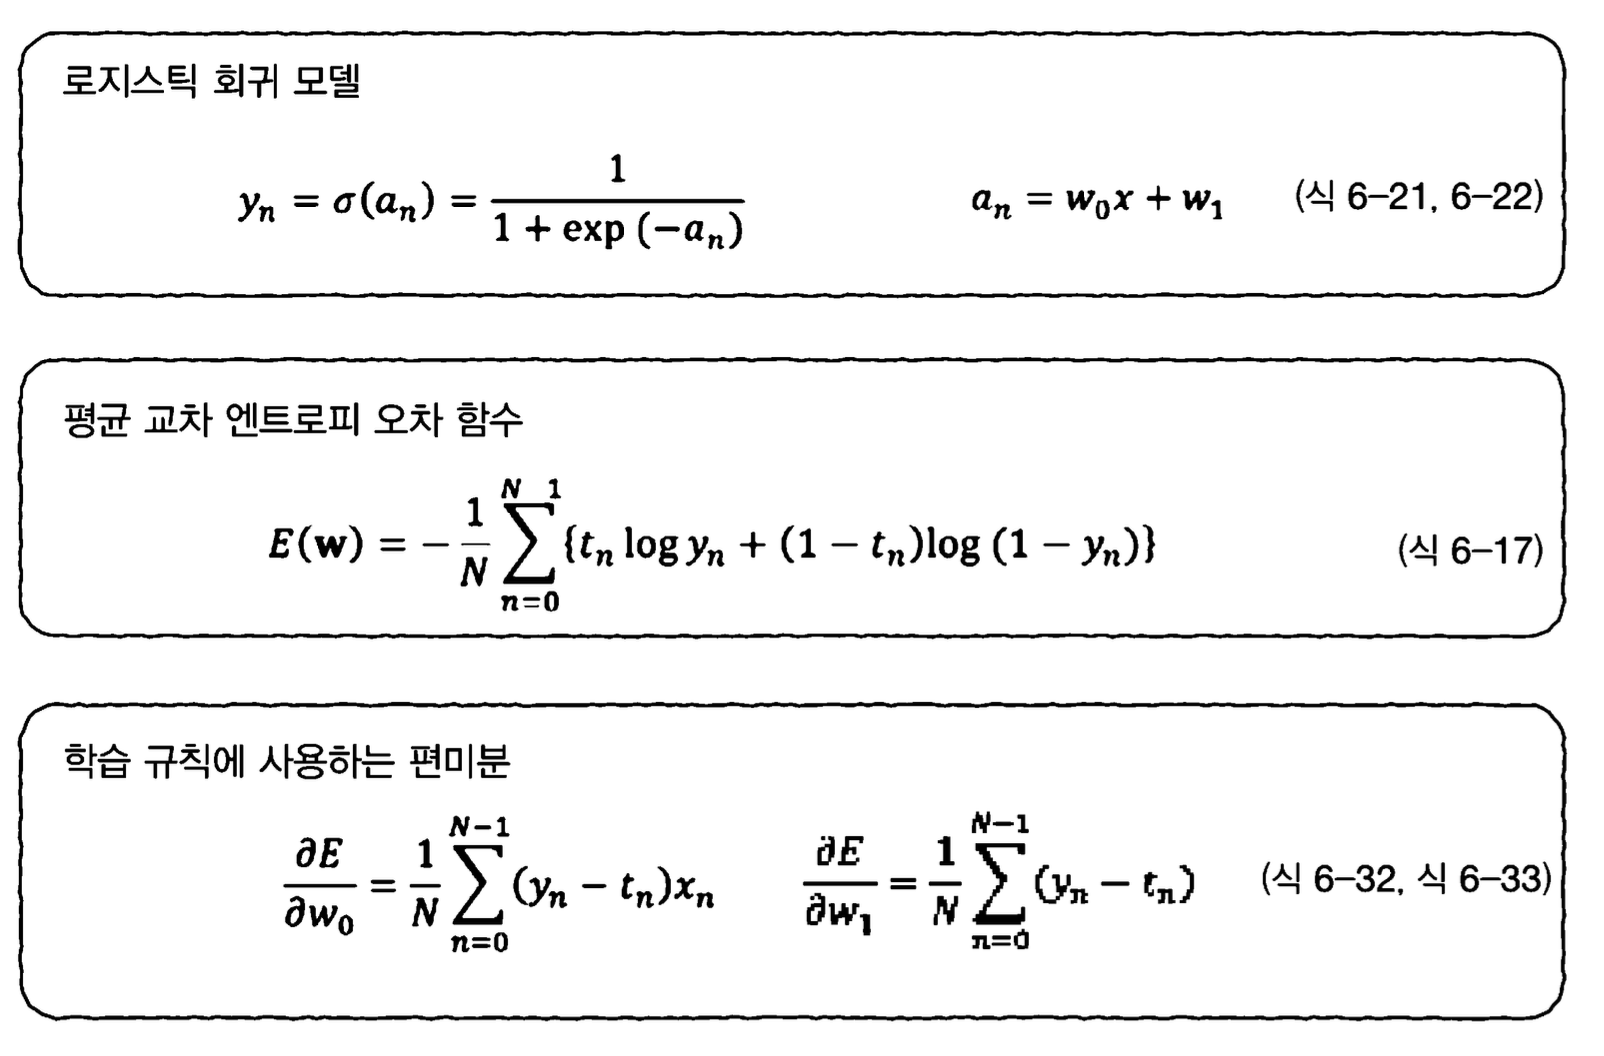

### 6.1.7 경사 하강법에 의한 해
- scipy.optimize 라이브러리에 포함된 minimize() 함수 이용, 학습률을 내부에서 자동으로 설정해줌

w0 = 8.18, w1 = -9.38
CEE = 0.25
Boundary = 1.15 g


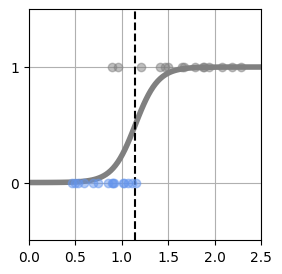

In [ ]:
from scipy.optimize import minimize

# 매개 변수 검색 ----------------
def fit_logistic(w_init, x, t):
    """
    인수로는 교차 엔트로피 함수, w의 초기값,
    args = (x, t)에는 cee_logistic의 w 이외의 인수
    jac = dcee_logistic에는 미분 함수 지정
    method = 'CG'로 켤레 기울기법이라는 경사 하강법의 일종을 지정
    - 켤레 기울기법(공역 기울기법, 공역 구배법): 대칭인 양의 준정부호행렬을 갖는 선형계의 해를 구하는 수치 알고리즘
    """
    res1 = minimize(cee_logistic, w_init, args=(x, t),
                    jac = dcee_logistic, method='CG') # (A)
    return res1.x

# 메인 ------------------------
plt.figure(1, figsize=(3, 3))
W_init = [1, -1]
W = fit_logistic(W_init, X, T)
print('w0 = {0:.2f}, w1 = {1:.2f}'.format(W[0], W[1]))
B = show_logistic(W)
show_data1(X, T)
plt.ylim(-.5, 1.5)
plt.xlim(X_min, X_max)
cee = cee_logistic(W, X, T)
print('CEE = {0:.2f}'.format(cee))
print('Boundary = {0:.2f} g'.format(B))
plt.show()

모델의 장점
- 출력 값이 P(t=1|x)라는 조건부 확률(사후확률)을 근사
    - 사후확률: 사건 발생(관측) 후 그것이 어떤 원인일 것이라고 기대되는 확률 </br>즉, 결과로부터 원인이 무엇일까, 라는 역방향 확률(사전확률의 역확률)
- 모호성을 포함하여 예측

## 6.2 2차원 입력 2클래스 분류
### 6.2.1 문제 설정

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성 ----------------
np.random.seed(seed=1) # 난수 고정
N = 100 # 데이터의 수
K = 3 # 분포 수
T3 = np.zeros((N, 3), dtype=np.uint8) ### 3클래스 분류의 분류 클래스 데이터는 T3에 저장 (N*3)
T2 = np.zeros((N, 2), dtype=np.uint8) ### 2클래스 분류의 분류 클래스 데이터는 T2에 저장 (N*2)
X = np.zeros((N, 2)) ### 입력 데이터는 N * 2

X_range0 = [-3, 3] # X0 범위 표시용
X_range1 = [-3, 3] # X1 범위 표시용

Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) # 분포의 중심
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) # 분포의 분산
Pi = np.array([0.4, 0.8, 1]) # (A) 각 분포에 대한 비율 0.4, 0.8, 1

for n in range(N):
    wk = np.random.rand() ### 0과 1 사이의 균일한 분포에서 난수를 생성하여 wk에 넣음
    for k in range(K): # (B)
        if wk < Pi[k]: ### line20에서 생성한 난수가 Pi[0]보다 작으면 클래스 0, Pi[1]보다 작으면 클래스 1, Pi[2]보다 작으면 2
            T3[n, k] = 1
            break
    for k in range(2):
        X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1, k]
                   + Mu[T3[n, :] == 1, k])
T2[:, 0] = T3[:, 0]
T2[:, 1] = T3[:, 1] | T3[:, 2]

In [ ]:
### 입력 데이터 X의 첫 5개
print(X[:5, :])

[[-0.14173827  0.86533666]
 [-0.86972023 -1.25107804]
 [-2.15442802  0.29474174]
 [ 0.75523128  0.92518889]
 [-1.10193462  0.74082534]]


In [ ]:
### 클래스 데이터 T2의 처음 5개
print(T2[:5, :])

[[0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]


위에서부터 차례로 클래스 1, 0, 0, 1, 0에 속한다는 의미
- 1인 열 번호가 클래스 번호를 나타냄

In [ ]:
### 클래스 데이터 T3의 처음 5개
print(T3[:5, :])

[[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]]


이처럼 목적 변수 벡터 tn의 k번째 요소만 1로, 그 외에는 0으로 표기하는 방법을 **1-of-K 부호화**라고 함
- 1-of-K 부호화는 0~K-1 의 값을 가지는 정수 스칼라 값을 0 또는 1을 가지는 K차원 벡터로 변환함

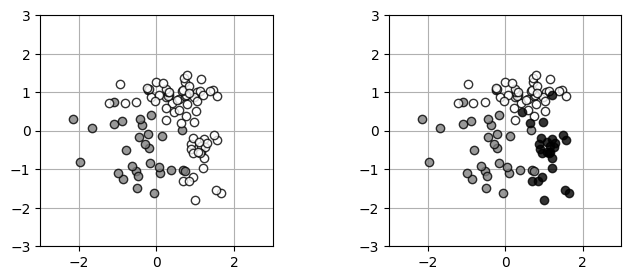

In [ ]:
# 데이터 표시 ---------------
def show_data2(x, t):
    wk, K = t.shape
    c = [[.5, .5, .5], [1, 1, 1], [0, 0, 0]]
    for k in range(K):
        plt.plot(x[t[:, k] == 1, 0], x[t[:, k] == 1, 1],
                 linestyle='none', markeredgecolor='black',
                 marker='o', color=c[k], alpha=0.8)
        plt.grid(True)

# 메인 ---------------------
plt.figure(figsize=(7.5, 3))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
show_data2(X, T2)
plt.xlim(X_range0)
plt.ylim(X_range1)

plt.subplot(1, 2, 2)
show_data2(X, T3)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()

### 6.2.2 로지스틱 회귀 모델
- 이번 모델의 출력 y는 클래스가 0인 확률 P(t=0|x)를 근사
- 모델의 매개 변수는 하나 증가하여 w0, w1, w2 세 가지

In [ ]:
# 로지스틱 회귀 모델 -------------
def logistic2(x0, x1, w):
    y = 1 / (1 + np.exp(-(w[0] * x0 + w[1] * x1 + w[2])))
    return y

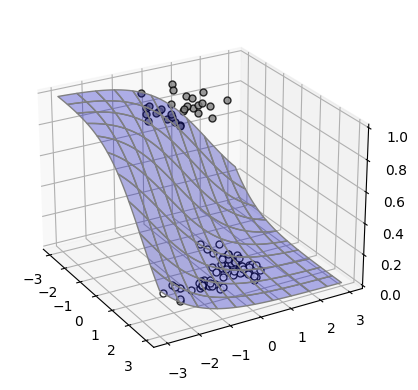

In [ ]:
# 모델 3D 보기 -----------------
from mpl_toolkits.mplot3d import axes3d

def show3d_logistic2(ax, w):
    xn = 50
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = logistic2(xx0, xx1, w)
    ax.plot_surface(xx0, xx1, y, color='blue', edgecolor='gray',
                    rstride=5, cstride=5, alpha=0.3)

def show_data2_3d(ax, x, t):
    c = [[.5, .5, .5], [1, 1, 1]]
    for i in range(2):
        ax.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], 1-i,
                marker='o', color=c[i], markeredgecolor='black',
                linestyle='none', markersize=5, alpha=0.8)
    Ax.view_init(elev=25, azim=-30)

# test -----------------------
Ax = plt.subplot(1, 1, 1, projection='3d')
W = [-1, -1, -1]
show3d_logistic2(Ax, W)
show_data2_3d(Ax, X, T2)

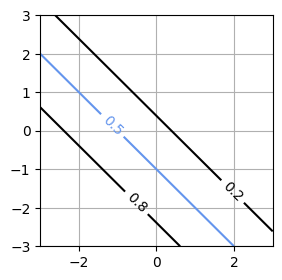

In [ ]:
# 모델 등고선 2D 표시 -------------
def show_contour_logistic2(w):
    xn = 30 # 매개 변수의 분할 수
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = logistic2(xx0, xx1, w)
    cont = plt.contour(xx0, xx1, y, levels=(0.2, 0.5, 0.8),
                       colors=['k', 'cornflowerblue', 'k'])
    cont.clabel(fmt='%1.1f', fontsize=10)
    plt.grid(True)

# test ------------------------
plt.figure(figsize=(3, 3))
W = [-1, -1, -1]
show_contour_logistic2(W)

2클래스 분류 문제이므로 T의 0열째 tn0를 tn으로 두고, 1이면 클래스 0, 0이면 클래스 1로 처리

In [ ]:
# 크로스 엔트로피 오차 ----------
def cee_logistic2(w, x, t):
    X_n = x.shape[0]
    y = logistic2(x[:, 0], x[:, 1], w)
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n, 0] * np.log(y[n]) +
                     (1 - t[n, 0]) * np.log(1-y[n]))
    cee = cee / X_n
    return cee

In [ ]:
# 크로스 엔트로피 오차의 미분 -----
def dcee_logistic2(w, x, t):
    X_n = x.shape[0]
    y = logistic2(x[:, 0], x[:, 1], w)
    dcee = np.zeros(3)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n, 0]) * x[n, 0]
        dcee[1] = dcee[1] + (y[n] - t[n, 0]) * x[n, 1]
        dcee[2] = dcee[2] + (y[n] - t[n, 0])
    dcee = dcee / X_n
    return dcee

# test ----------------------
W = [-1, -1, -1]
dcee_logistic2(W, X, T2)

array([ 0.10272008,  0.04450983, -0.06307245])

w0 = -3.70, w1 = -2.54, w2 = -0.28
CEE = 0.22


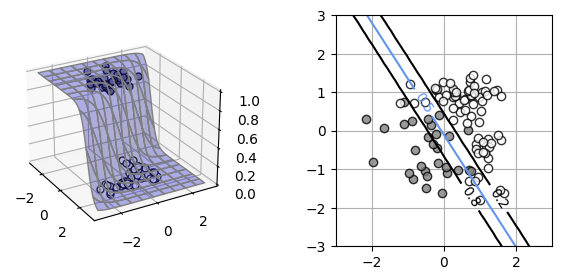

In [ ]:
### 평균 교차 엔트로피 오차가 최소가 되도록 로지스틱 회귀 모델의 매개 변수를 구하고 결과 표시
from scipy.optimize import minimize

# 로지스틱 회귀 모델의 매개 변수 검색 --------
def fit_logistic2(w_init, x, t):
    res = minimize(cee_logistic2, w_init, args=(x, t),
                   jac=dcee_logistic2, method='CG')
    return res.x

# 메인 --------------------------------
plt.figure(1, figsize=(7, 3))
plt.subplots_adjust(wspace=0.5)

Ax = plt.subplot(1, 2, 1, projection='3d')
W_init = [-1, 0, 0]
W = fit_logistic2(W_init, X, T2)
print('w0 = {0:.2f}, w1 = {1:.2f}, w2 = {2:.2f}'.format(W[0], W[1], W[2]))
show3d_logistic2(Ax, W)

show_data2_3d(Ax, X, T2)
cee = cee_logistic2(W, X, T2)
print('CEE = {0:.2f}'.format(cee))

Ax = plt.subplot(1, 2, 2)
show_data2(X, T2)
show_contour_logistic2(W)
plt.show()

- 목표를 분리하는 곳에서 결정 경계가 그려진 것을 확인할 수 있음 (파란 실선)
- 사용한 로지스틱 회귀 모델의 시그모이드 함수의 내용은 면 모델 (시그모이드 함수에 의해 0과 1 사이에 들어감, 왼쪽 그래프)
    - 평면을 넣었기 때문에 결정 경계는 반드시 직선이 됨

## 6.3 2차원 입력 3클래스 분류
### 6.3.1 3클래스 분류 로지스틱 회귀 모델
- 소프트백스 함수를 모델의 출력에 사용하여 3클래스 이상의 클래스 분류에 대응 가능

In [ ]:
# 3클래스용 로지스틱 회귀 모델 --------
def logistic3(x0, x1, w):
    K = 3
    ### minimize에 대응하기 위해 입력 W는 3*3 행렬을 늘어놓은 요소 수 9개의 벡터로 취급
    w = w.reshape((3, 3))
    n = len(x1)
    y = np.zeros((n, K))
    for k in range(K):
        y[:, k] = np.exp(w[k, 0] * x0 + w[k, 1] * x1 + w[k, 2])
    wk = np.sum(y, axis=1)
    wk = y.T / wk
    y = wk.T
    return y

# test -------------------------
### 위에서부터 3개의 입력 데이터와 시험적으로 결정한 W에 대한 출력을 확인하고 있음
### 같은 라인의 요소를 더하면 1이 됨
W = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y = logistic3(X[:3, 0], X[:3, 1], W)
print(np.round(y, 3))

[[0.    0.006 0.994]
 [0.965 0.033 0.001]
 [0.925 0.07  0.005]]


### 6.3.2 교차 엔트로피 오차
- 가능도(우도): 모든 입력 데이터 X에 대해서 전체 클래스 데이터 T가 생성된 확률

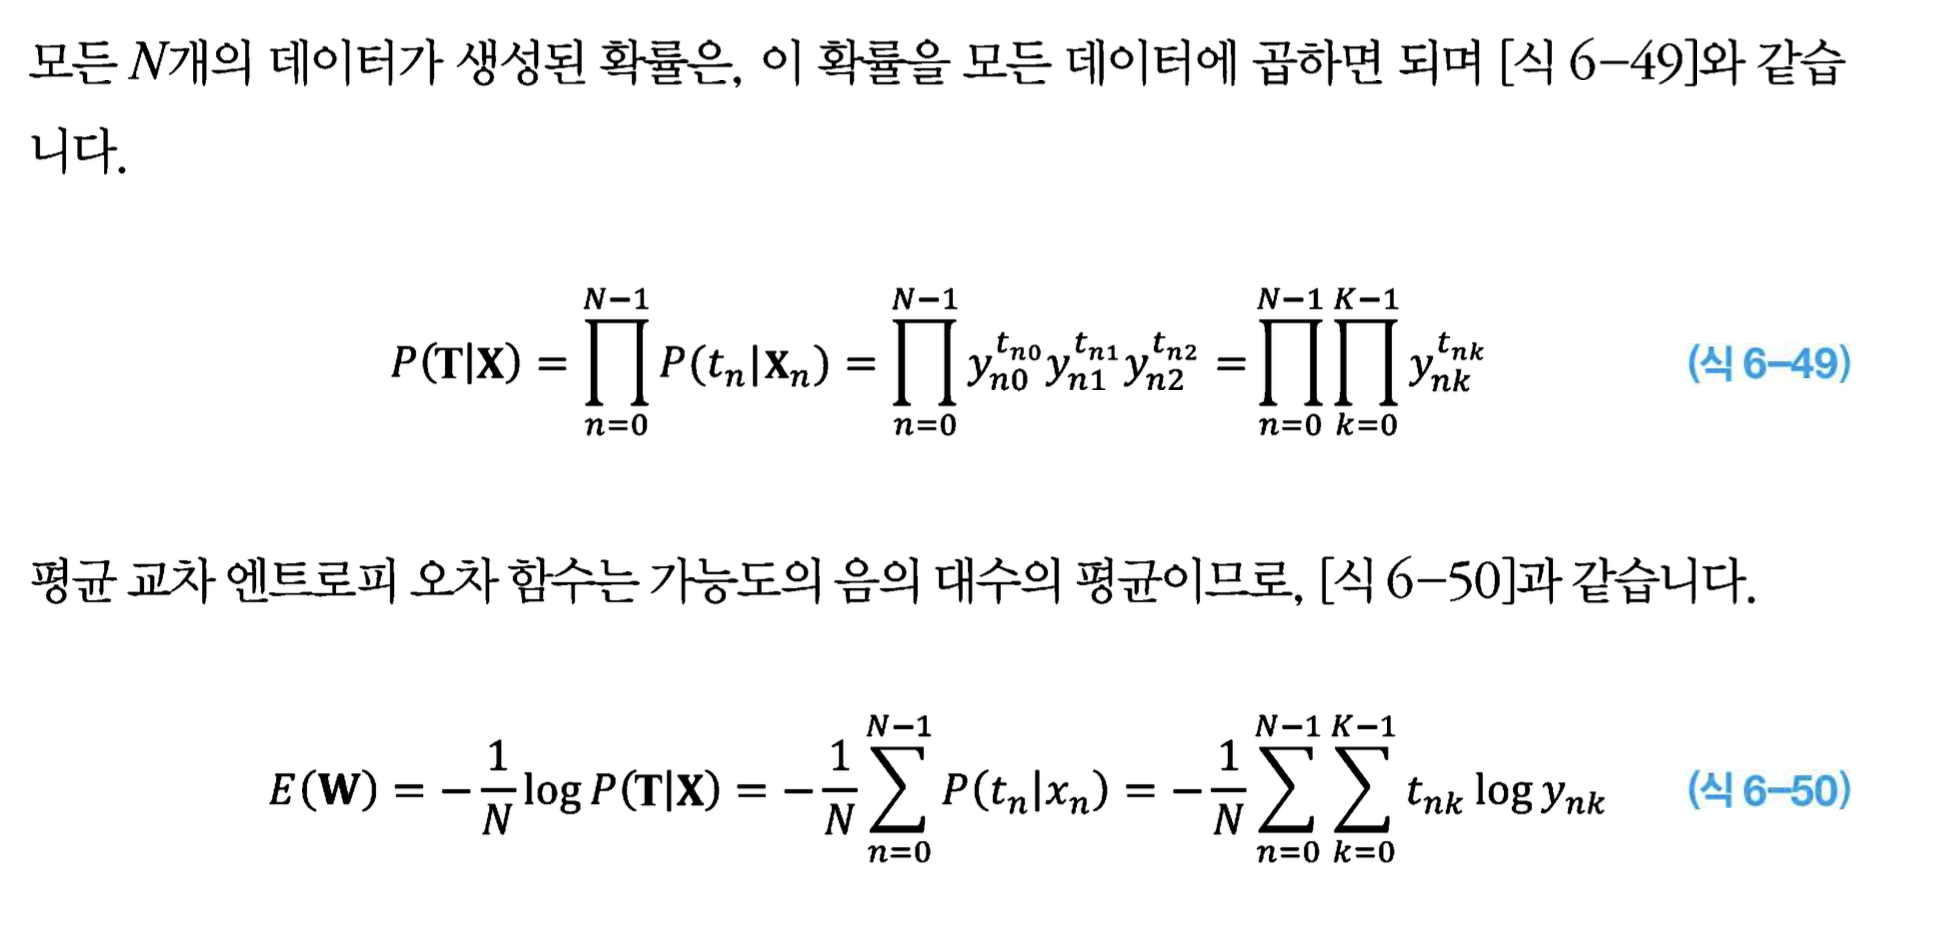

In [ ]:
# 교차 엔트로피 오차 -----------------
def cee_logistic3(w, x, t):
    X_n = x.shape[0]
    y = logistic3(x[:, 0], x[:, 1], w)
    cee = 0
    N, K = y.shape
    for n in range(N):
        for k in range(K):
            cee = cee - (t[n, k] * np.log(y[n, k]))
    cee = cee / X_n
    return cee

# test ---------------------------
W = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
cee_logistic3(W, X, T3) ### 9개 요소의 배열 W와 X, T3를 인수로 스칼라 값을 출력함

3.9824582404787288

### 6.3.3 경사 하강법에 의한 해

In [ ]:
# 교차 엔트로피 오차의 미분 -------
def dcee_logistic3(w, x, t):
    X_n = x.shape[0]
    y = logistic3(x[:, 0], x[:, 1], w)
    dcee = np.zeros((3, 3)) # (클래스의 수 K) * (x의 차원 D+1)
    N, K = y.shape
    for n in range(N):
        for k in range(K):
            dcee[k, :] = dcee[k, :] - (t[n, k] - y[n, k]) * np.r_[x[n, :], 1]
    dcee = dcee / X_n
    return dcee.reshape(-1)

# test ----------------------
W = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
dcee_logistic3(W, X, T3)

array([ 0.03778433,  0.03708109, -0.1841851 , -0.21235188, -0.44408101,
       -0.38340835,  0.17456754,  0.40699992,  0.56759346])

In [ ]:
# 매개 변수 검색 ----------
def fit_logistic3(w_init, x, t):
    res = minimize(cee_logistic3, w_init, args=(x, t),
                   jac=dcee_logistic3, method='CG')
    return res.x

In [ ]:
# 모델 등고선 2D 표시 -----------
### 가중치 매개변수 w를 전달하면, 표시할 입력 공간을 30*30으로 분할하여 모든 입력에 대해 네트워크의 출력을 확인
### 각각의 카테고리에서 0.5 또는 0.9 이상의 출력을 얻는 영역을 등고선으로 표시
def show_contour_logistic3(w):
    xn = 30 # 매개 변수의 분할 수
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)

    xx0, xx1 = np.meshgrid(x0, x1)
    y = np.zeros((xn, xn, 3))
    for i in range(xn):
        wk = logistic3(xx0[:, i], xx1[:, i], w)
        for j in range(3):
            y[:, i, j] = wk[:, j]
    for j in range(3):
        cont = plt.contour(xx0, xx1, y[:, :, j],
                           levels=(0.5, 0.9),
                           colors=['cornflowerblue', 'k'])
        cont.clabel(fmt='%1.1f', fontsize=9)
    plt.grid(True)

[[-3.2  -2.69  2.25]
 [-0.49  4.8  -0.69]
 [ 3.68 -2.11 -1.56]]
CEE = 0.23


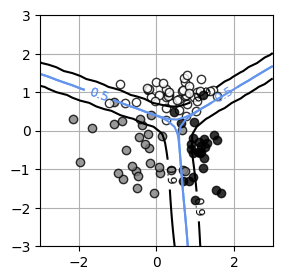

In [ ]:
# 메인 ----------------------------
"""
ValueError: 'x0' must only have one dimension.
위의 오류를 해결하기 위해 W_init 배열을 1차원으로 변환
"""
W_init = np.zeros((3, 3)).reshape(-1)
W = fit_logistic3(W_init, X, T3)
print(np.round(W.reshape(3, 3), 2))
cee = cee_logistic3(W, X, T3)
print('CEE = {0:.2f}'.format(cee))

plt.figure(figsize=(3, 3))
show_data2(X, T3)
show_contour_logistic3(W)
plt.show()

- 다중 클래스 로지스틱 회귀 모델에서는 클래스 간 경계선이 직선의 조합으로 구성
    - 모호성을 조건부 확률로 근사한다는 점이 이 모델의 훌륭한 점!